In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
rankings_data=pd.read_csv("ranking_data.csv")

In [4]:
rankings_data.columns

Index([u'CSA2010', u'Number of Homes Sold (2010)',
       u'Number of Homes Sold (2011)', u'Number of Homes Sold (2012)',
       u'Number of Homes Sold (2013)', u'Number of Homes Sold (2014)',
       u'Median Price of Homes Sold (2010)',
       u'Median Price of Homes Sold (2011)',
       u'Median Price of Homes Sold (2012)',
       u'Median Price of Homes Sold (2013)',
       u'Median Price of Homes Sold (2014)',
       u'Median Number of Days on the Market (2010)',
       u'Median Number of Days on the Market (2011)',
       u'Median Number of Days on the Market (2012)',
       u'Median Number of Days on the Market (2013)',
       u'Median Number of Days on the Market (2014)',
       u'Percentage of Housing Units that are Owner-Occupied (2010)',
       u'Percentage of Housing Units that are Owner-Occupied (2011)',
       u'Percentage of Housing Units that are Owner-Occupied (2012)',
       u'Percentage of Housing Units that are Owner-Occupied (2013)',
       u'Percentage of Housing U

In [5]:
rankings_data = rankings_data[rankings_data.CSA2010 != "Baltimore City"]

In [6]:
rankings_data=rankings_data.dropna()

In [7]:
comm=rankings_data["CSA2010"]
median_price=list(rankings_data["Median Price of Homes Sold (2014)"])

In [8]:
median_price=[i.replace("$", "") for i in median_price]
median_price=[i.replace(",", "") for i in median_price]
median_price=[float(i) for i in median_price]
median_tom=rankings_data["Median Number of Days on the Market (2014)"]

In [9]:
ranks_1=pd.DataFrame()

In [10]:
ranks_1["Neighbourhood"]=pd.Series(comm)
ranks_1["MedianHousePrice"]=pd.Series(median_price)
ranks_1["MedianTOM"]=pd.Series(median_tom)

In [11]:
price_mean=ranks_1["MedianTOM"].mean()
std_tom=[-1*(i-price_mean) for i in ranks_1["MedianTOM"]]

In [12]:
ranks_1["TOM Deviations"]=std_tom

## 

In [13]:
ranks_1_ranked=ranks_1.sort_values(["TOM Deviations"],ascending=False)
ranks_1_ranked.to_csv("Ranking 1.csv")
ranks_1_ranked

,Neighbourhood,MedianHousePrice,MedianTOM,TOM Deviations
47,South Baltimore,289900.0,23,19.745455
45,Poppleton/The Terraces/Hollins Market,73600.0,27,15.745455
29,Inner Harbor/Federal Hill,320000.0,28,14.745455
35,Midway/Coldstream,17005.0,28,14.745455
42,Patterson Park North & East,172000.0,28,14.745455
33,Medfield/Hampden/Woodberry/Remington,175000.0,29,13.745455
54,Westport/Mount Winans/Lakeland,35500.0,30,12.745455
4,Canton,275000.0,30,12.745455
52,Upton/Druid Heights,71202.0,31,11.745455
9,Clifton-Berea,20000.0,32,10.745455


In [14]:
score=[]
for i in range(0,len(ranks_1["MedianHousePrice"])):
    score.append(ranks_1["MedianHousePrice"][i]/ranks_1["MedianTOM"][i])
score=[i/1000 for i in score]
ranks_1["Dev Score"]=pd.Series(score)

In [15]:
ranks_ranked2=ranks_1.sort_values("Dev Score",ascending=False)
ranks_ranked2.to_csv("ranks_hotness.csv")

In [16]:
ranks2=pd.DataFrame()

In [17]:
pop05=rankings_data["Percent of Population 0-5 years old (2010)"]
pop618=rankings_data["Percent of Population 6-18 years old (2010)"]
pop2564=rankings_data["Percent of Population 25-64 years old (2010)"]
race_div=rankings_data["Racial Diversity Index (2010)"]

In [18]:
ranks2["Neighbourhood"]=pd.Series(comm)
ranks2["Pop05"]=pd.Series(pop05)
ranks2["MedianTOM"]=pd.Series(median_tom)
ranks2["Pop618"]=pd.Series(pop618)
ranks2["Pop2564"]=pd.Series(pop2564)
ranks2["Diversity Index"]=pd.Series(race_div)

In [19]:
ranks2.head(3)

,Neighbourhood,Pop05,MedianTOM,Pop618,Pop2564,Diversity Index
0,Allendale/Irvington/S. Hilton,6.6,43,18.4,51.9,22.9
1,Beechfield/Ten Hills/West Hills,6.5,49,16.7,56.2,36.2
2,Belair-Edison,6.9,39,20.2,54.0,24.6


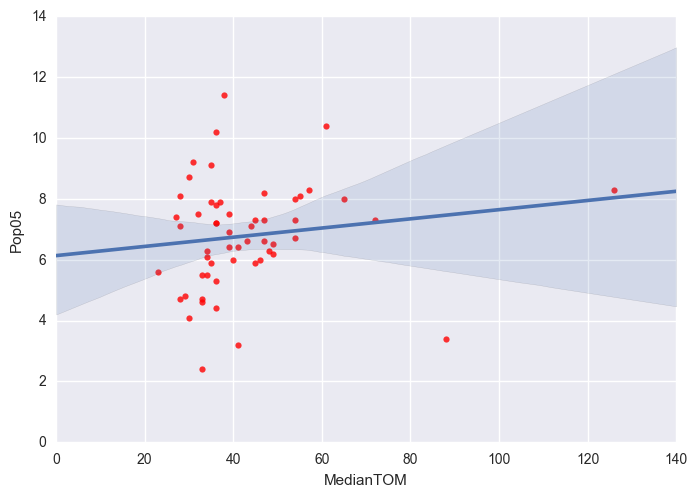

In [20]:
sns.regplot(ranks2.MedianTOM ,ranks2.Pop05,order=1,scatter_kws={'color':'r'})

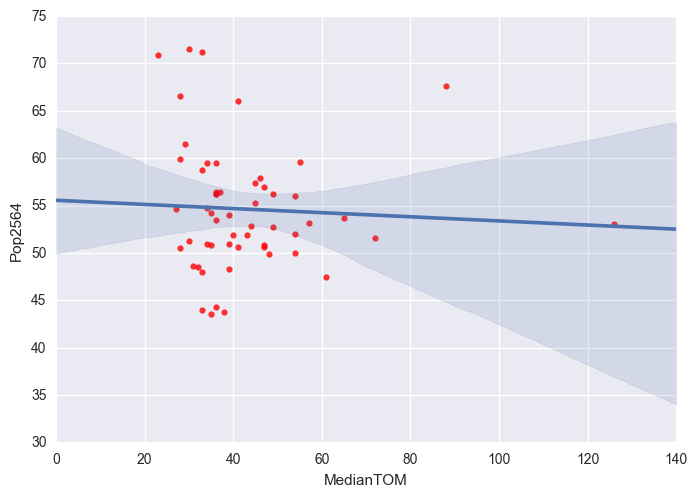

In [21]:
sns.regplot(ranks2.MedianTOM ,ranks2.Pop2564,order=1,scatter_kws={'color':'r'})

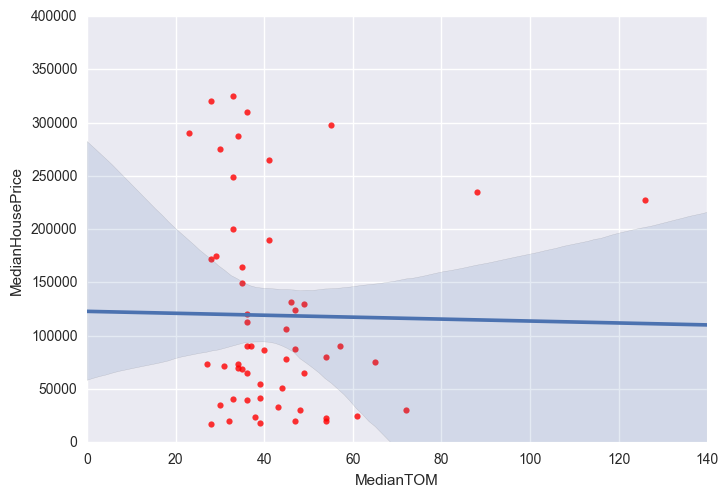

In [22]:
sns.regplot(ranks_1.MedianTOM ,ranks_1.MedianHousePrice,order=1,scatter_kws={'color':'r'})

plt.ylim(ymin=0);

In [23]:
income_price=pd.DataFrame()
income_price["Neighbourhood"]=pd.Series(comm)
income=rankings_data["Median Household Income (2010-2014)"]
income=[i.replace("$", "") for i in income]
income=[i.replace(",", "") for i in income]
income=[float(i) for i in income]
income_price["MedianIncome"]=pd.Series(income)
income_price["MedianPrice"]=pd.Series(median_price)

In [24]:
type(income_price["MedianIncome"][0])

numpy.float64

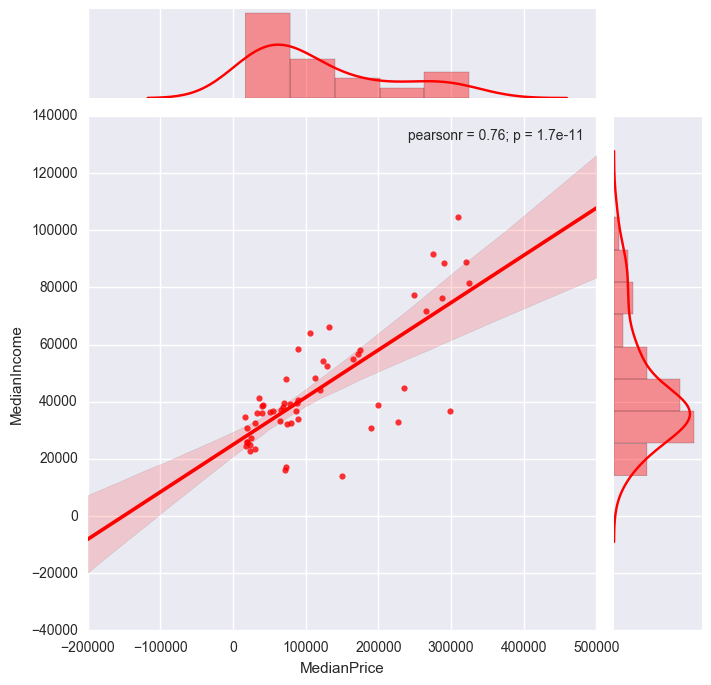

In [25]:
g=sns.jointplot("MedianPrice", "MedianIncome", data=income_price, kind="reg", color="r", size=7)

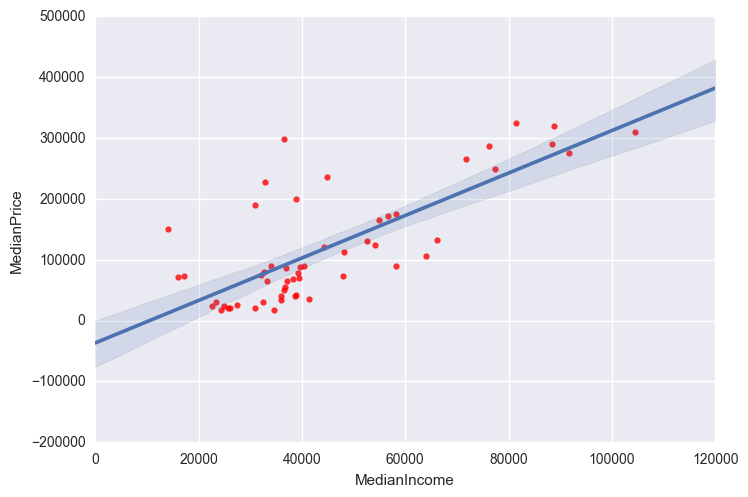

In [26]:
sns.regplot(income_price.MedianIncome,income_price.MedianPrice,order=1,scatter_kws={'color':'r'})

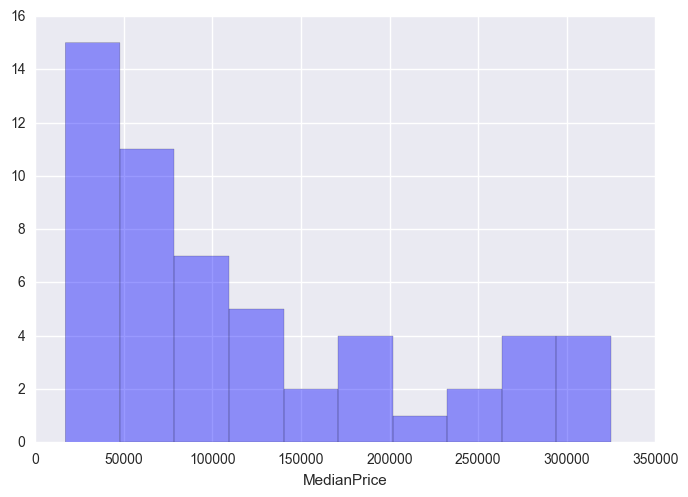

In [27]:
sns.distplot(income_price["MedianPrice"], kde=False, color="b",bins=10)

In [30]:
bpl=pd.Series(rankings_data['Percent of Family Households Living Below the Poverty Line (2010-2014)'])
bpl_rank=pd.DataFrame()
bpl_rank["Neighbourhood"]=pd.Series(comm)
bpl_rank["BPL"]=bpl
bpl_ranked=bpl_rank.sort_values(by="BPL",ascending=True)

In [32]:
bpl_ranked.to_csv("BPL_ranks.csv")